In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


# 1. Import and Load data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")
sub = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv")

In [4]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [5]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [9]:
train.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

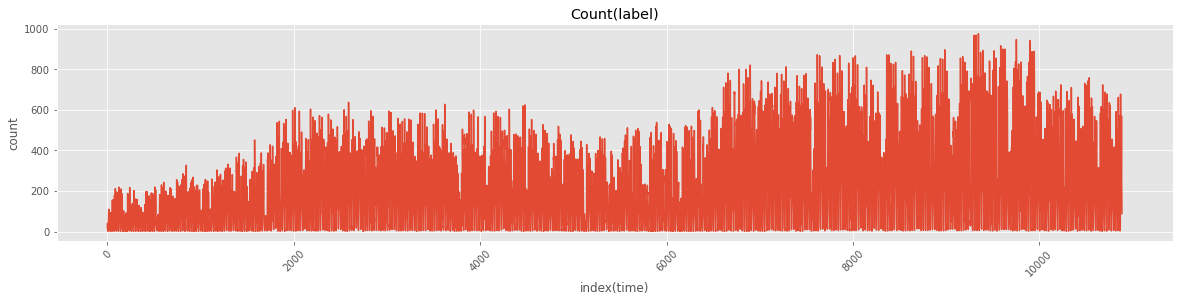

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(20,4))
plt.plot(train['count'])
plt.title('Count(label)')
plt.xlabel('index(time)')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show();

### Train and Test data

* datetime 이 object type 이므로 변경해줘야 겠다.
* 숫자형 데이터와 카테고리형 데이터가 적절히 섞여있다.

# 2. Description

You are provided hourly rental data spanning two years. For this competition, 
`the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month.` 
You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

* **Data Fields**  
    datetime - hourly date + timestamp    
    season -  1 = spring, 2 = summer, 3 = fall, 4 = winter   
    holiday - whether the day is considered a holiday  
    workingday - whether the day is neither a weekend nor holiday  
    weather - 1 : Clear, Few clouds, Partly cloudy, Partly cloudy  
    weather - 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
    weather - 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
    weather - 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   
    temp - temperature in Celsius  
    atemp - "feels like" temperature in Celsius  
    humidity - relative humidity  
    windspeed - wind speed  
    casual - number of non-registered user rentals initiated  
    registered - number of registered user rentals initiated  
    count - number of total rentals  

# 3. EDA

In [11]:
train2 = train.copy()
train2['datetime'] = train2['datetime'].astype('datetime64')
train2['year'] = train2['datetime'].dt.year
train2['month'] = train2['datetime'].dt.month
train2['week'] = train2['datetime'].dt.week
train2['day'] = train2['datetime'].dt.day
train2['hour'] = train2['datetime'].dt.hour
train2.drop(['datetime','casual','registered'], 1, inplace=True)
train2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,week,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,52,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,52,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,52,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,52,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,52,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,51,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,51,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,51,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,51,19,22


### 3-1) 카테고리형 컬럼 추이 확인

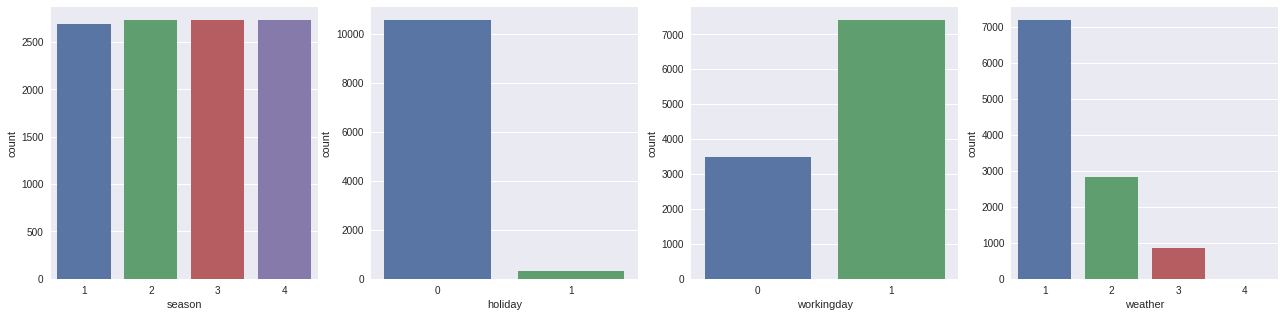

In [12]:
plt.style.use('seaborn')
fig, axes = plt.subplots(1,4, figsize=(22,5))
sns.countplot(train['season'], ax=axes[0])
sns.countplot(train['holiday'], ax=axes[1])
sns.countplot(train['workingday'], ax=axes[2])
sns.countplot(train['weather'],ax=axes[3])
plt.show();

* season : 각 계절이 거의 균등한 비율로 들어가 있다. season 과 count 간의 상관관계를 조사해보자.
* holiday : 휴일 여부 이므로, 데이터가 균등하지 않다. holiday 와 count 간의 상관관계를 조사해보자.
* workingday : 주일과 주말 비율이므로 데이터가 균등하지 않다. workingday 와 count 간의 상관관계를 조사해보자.
* weather : 날씨의 경우 데이터가 균등하지 않다. weather와 count간의 상관관계를 조사해보자.

### 3-2) 숫자형 컬럼 추이 확인

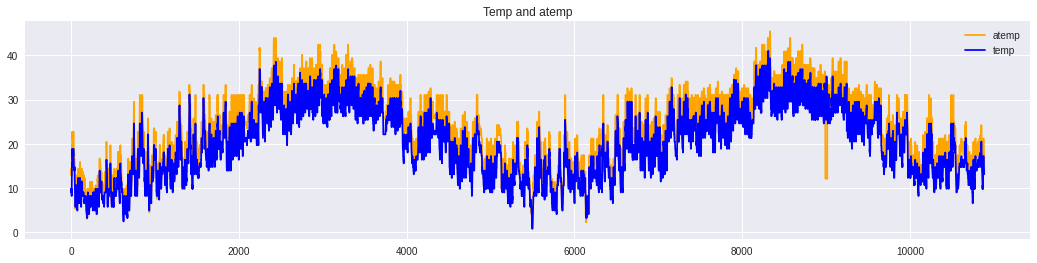

In [13]:
plt.figure(figsize=(18,4))
plt.plot(train2['atemp'], 'orange', label='atemp') # 체감온도
plt.plot(train2['temp'], 'b', label='temp') # 온도
plt.title('Temp and atemp')
plt.legend(loc='best')
plt.show();

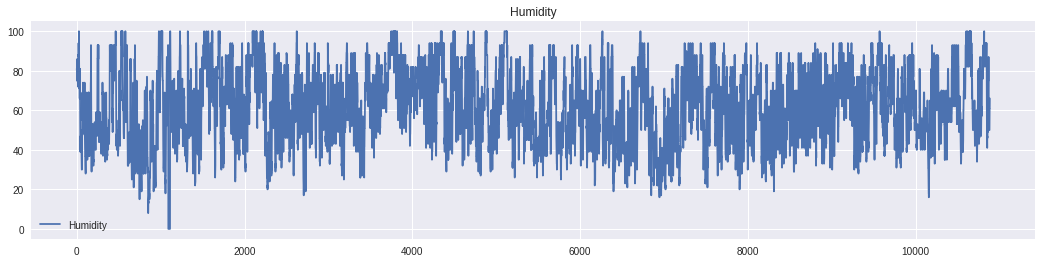

In [14]:
plt.figure(figsize=(18,4))
plt.plot(train2['humidity'], label='Humidity')
plt.title('Humidity')
plt.legend(loc='best')
plt.show();

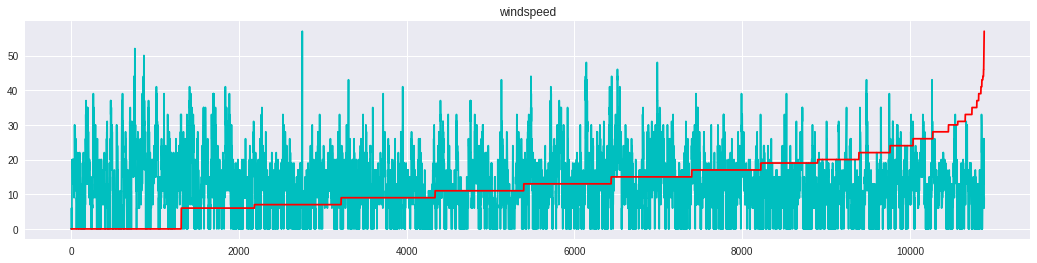

In [15]:
plt.figure(figsize=(18,4))
plt.plot(train['windspeed'], color='c')
plt.plot(sorted(train['windspeed']), color='r')
plt.title('windspeed')
plt.show();

* 0으로 기록된 데이터가 많은 것으로 봐서, 기록되지 않은 windspeed 를 0으로 기록했을 가능성도 있겠다.

### 3-3) 시간 칼럼 추이 확인

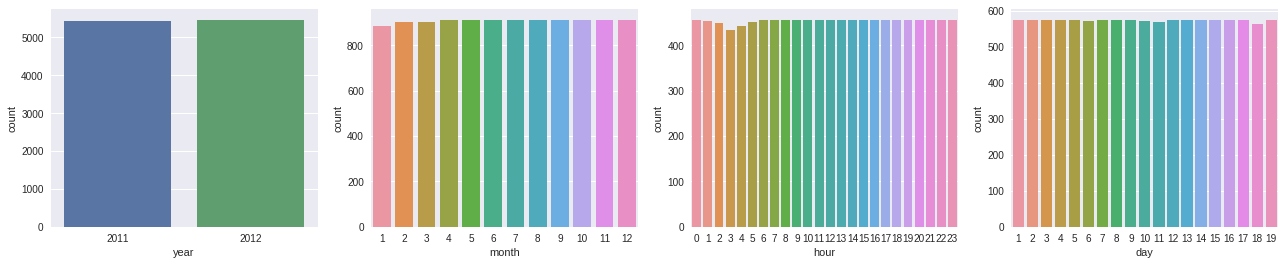

In [16]:
fig, axes = plt.subplots(1,4, figsize=(22,4))
sns.countplot(train2['year'], ax=axes[0])
sns.countplot(train2['month'], ax=axes[1])
sns.countplot(train2['hour'], ax=axes[2])
sns.countplot(train2['day'], ax=axes[3])
plt.show();

* 대부분 균등한 비율을 보인다.
* description 대로, train set 의 day 의 경우 1-19일 까지 밖에 없다.

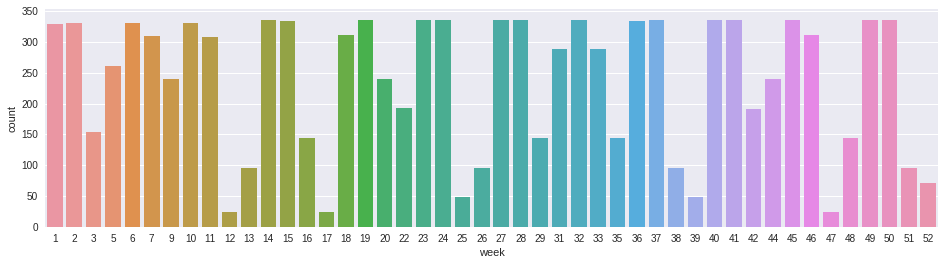

In [17]:
plt.figure(figsize=(16,4))
sns.countplot(train2['week'])
plt.show();

* 주차 비율이 불균형한 이유는, 1-19일만 train set 에 들어있기 때문이다.

### 3-4) 컬럼 간의 상관관계

1. 시간 컬럼과 count  
2. 카테고리형 컬럼과 count  
3. 복합  

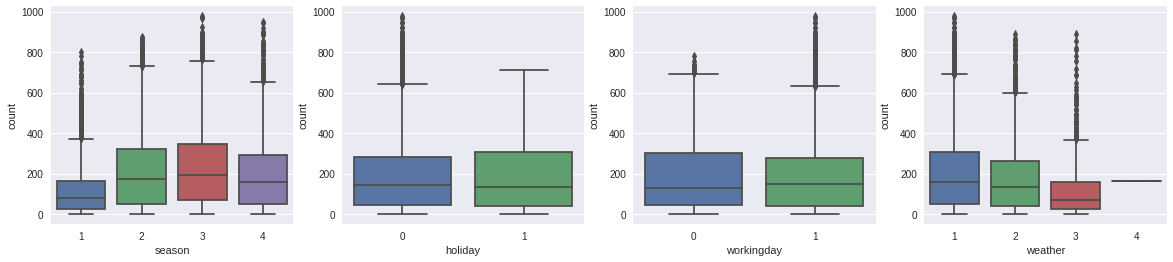

In [18]:
fig, axes = plt.subplots(1,4, figsize=(20,4))
sns.boxplot(x='season', y='count', data=train2, ax=axes[0])
sns.boxplot(x='holiday', y='count', data=train2, ax=axes[1])
sns.boxplot(x='workingday', y='count', data=train2, ax=axes[2])
sns.boxplot(x='weather', y='count', data=train2, ax=axes[3])
plt.show();

* season 별로 여름과 가을에 count 값이 높은 편이다.
* holiday, workingday 에 따른 변화는 있지만, 매우 큰 편은 아니다.
* weather 의 경우, 3,4 (눈이 오거나 비가오는 경우)의 경우에는 빌리는 횟수가 급격하게 줄어든 것을 확인할 수 있다.

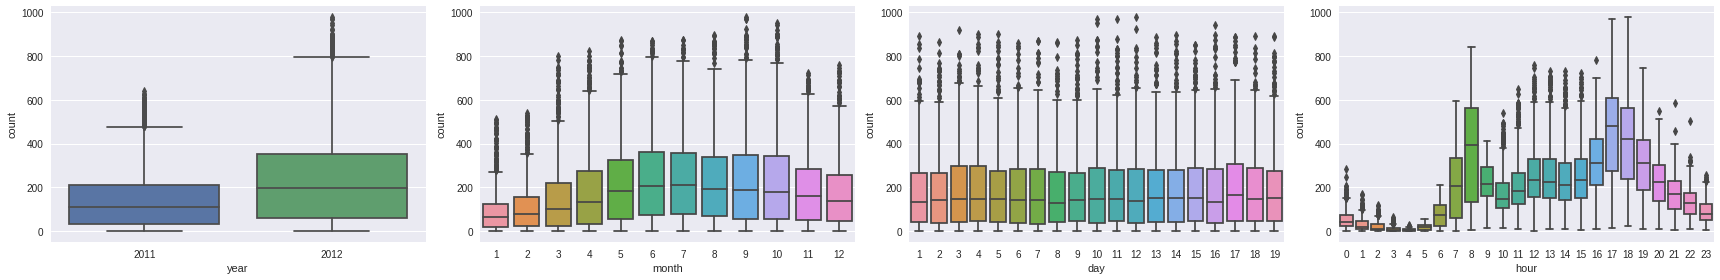

In [19]:
fig, axes = plt.subplots(1,4, figsize=(24,4))
sns.boxplot(train2['year'], train2['count'], ax=axes[0])
sns.boxplot(train2['month'], train2['count'], ax=axes[1])
sns.boxplot(train2['day'], train2['count'], ax=axes[2])
sns.boxplot(train2['hour'], train2['count'], ax=axes[3])
plt.tight_layout()
plt.show();

boxplot 으로 전반적 count 추이를 보자.

* 2011년도보다 2012년도에 count 가 올라갔다.
* month 별로, 5-10월에 count가 높고, 1-4, 11-12 월에 count가 낮은 편이다.
* hour에 따른 변동이 크다. 특히 outlier가 특정 시간대에 유독 많이 분포하는 것을 볼 수 있다. 휴일이나, 주말 등과 관련이 있을 것으로 유추해볼 수 있겠다.

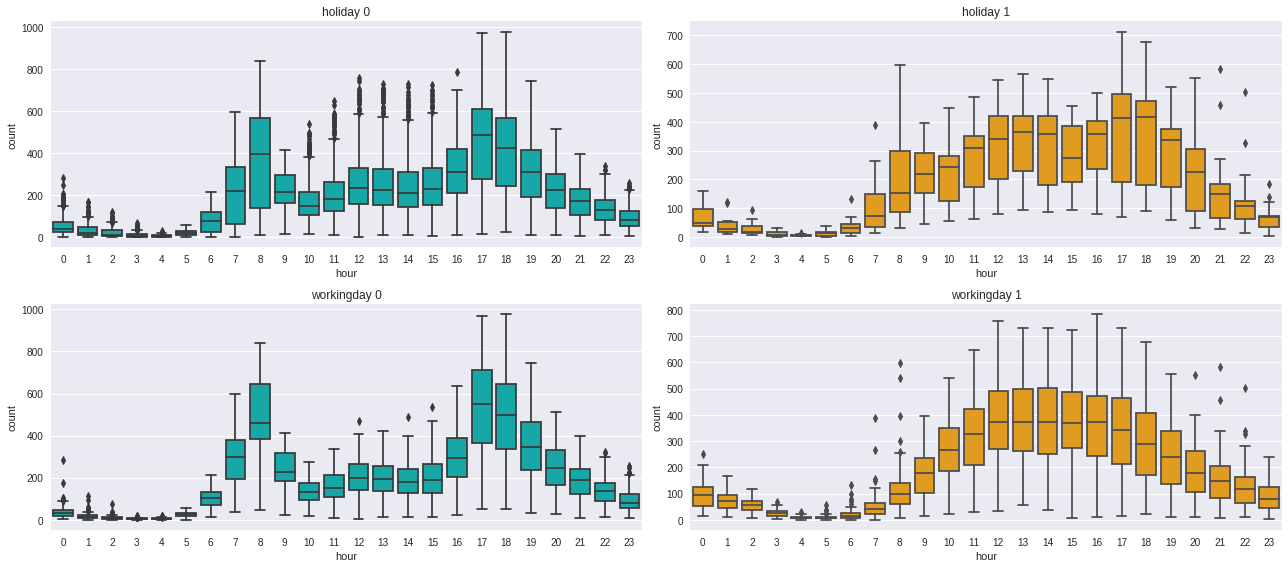

In [20]:
fig, axes = plt.subplots(2,2,figsize=(18,8))
sns.boxplot(x = 'hour', y = 'count', data = train2[train2['holiday']==0], ax=axes[0,0], color='c')
axes[0,0].set_title('holiday 0')
sns.boxplot(x = 'hour', y = 'count', data = train2[train2['holiday']==1], ax=axes[0,1], color='orange')
axes[0,1].set_title('holiday 1')

sns.boxplot(x = 'hour', y = 'count', data = train2[train2['workingday']==1], ax=axes[1,0], color='c')
axes[1,0].set_title('workingday 0')
sns.boxplot(x = 'hour', y = 'count', data = train2[train2['workingday']==0], ax=axes[1,1], color='orange')
axes[1,1].set_title('workingday 1')

plt.tight_layout()
plt.show();

* holiday 및 workingday 에 따른 count 분포가 다르다.
* 휴일일때와 그렇지 않을때 시간별 count 값의 분포가 매우 다르다는 것을 볼 수 있다.

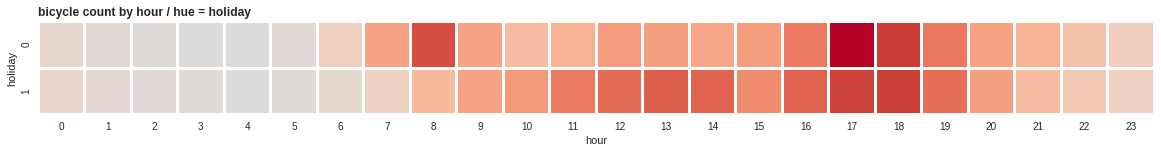

In [21]:
pd.options.display.max_columns = 999
train_holiday = train2.groupby(['hour','holiday'])['count'].median().unstack().T

plt.figure(figsize=(20,2))
sns.heatmap(train_holiday, center=0,
            cmap='coolwarm',
            square=True, cbar=False,
            linewidth=2.0
            )

plt.title("bicycle count by hour / hue = holiday", fontweight='bold', loc='left')
plt.show();

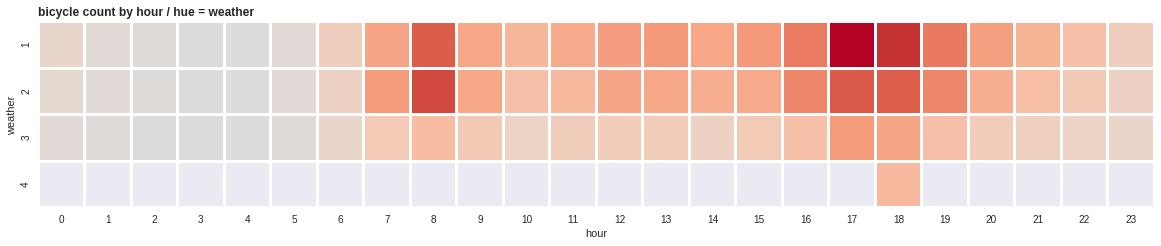

In [22]:
train_weather = train2.groupby(['hour','weather'])['count'].median().unstack().T

plt.figure(figsize=(20,4))
sns.heatmap(train_weather, center=0,
            cmap='coolwarm',
            square=True, cbar=False,
            linewidth=2.0
            )

plt.title("bicycle count by hour / hue = weather", fontweight='bold', loc='left')
plt.show();

In [23]:
corr = train2.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','count']].corr().drop('count',1)
corr.style.background_gradient()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369


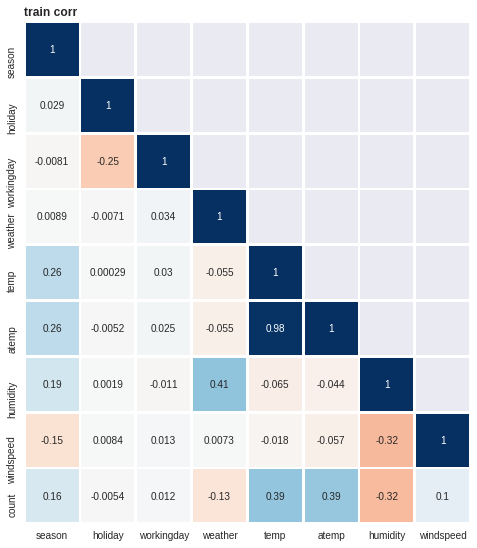

In [24]:
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(8,10))
sns.heatmap(corr, square=True, 
            vmin=-0.5, vmax=1,
            mask=mask, 
            center=0, 
            cmap='RdBu',
            cbar=False, 
            linewidth=2.0, 
            annot=True)
plt.title("train corr", fontweight='bold', loc='left')
plt.show();

# 4. Feature engineering

In [25]:
allData = pd.concat([train, test])
allData

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [26]:
allData['datetime'] = allData['datetime'].astype('datetime64')
allData['year'] = allData['datetime'].dt.year
allData['weekday'] = allData['datetime'].dt.weekday
allData['hour'] = allData['datetime'].dt.hour
allData.drop(['datetime','casual','registered','count'],1,inplace=True)
allData

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,weekday,hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,5,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,5,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,5,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,5,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,5,4
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,0,19
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,0,20
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,0,21
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,0,22


### Metrics

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE).  
The RMSLE is calculated as

$$1n∑i=1n(log(pi+1)−log(ai+1))2$$


In [27]:
train2 = allData[:len(train)]
test2 = allData[len(train):]
label = np.log(train['count'])

# 5. Modeling

In [28]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [29]:
# RANDOMFOREST
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(train2, label)
result_rfr = np.exp(rfr.predict(test2))
result_rfr

array([11.68854474,  4.70049387,  3.45005936, ..., 99.79174769,
       96.42225598, 45.69565156])

In [30]:
# XGBOOST
xgb = XGBRegressor(learning_rate=0.1, max_depth=3)
xgb.fit(train2, label)
result_xgb = np.exp(xgb.predict(test2))
result_xgb

[07:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([  7.669636 ,   4.9998026,   2.9258118, ..., 100.63521  ,
        83.67769  ,  48.100765 ], dtype=float32)

In [31]:
cat_feat = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'week', 'day', 'hour']

In [32]:
# CATBOOST
cat = CatBoostRegressor()
cat.fit(train2, label, verbose=100)
result_cat = np.exp(cat.predict(test2)) # cat_features
result_cat

Learning rate set to 0.059698
0:	learn: 1.4273716	total: 57.9ms	remaining: 57.9s
100:	learn: 0.3655645	total: 388ms	remaining: 3.45s
200:	learn: 0.3183757	total: 718ms	remaining: 2.85s
300:	learn: 0.3002479	total: 1.04s	remaining: 2.41s
400:	learn: 0.2886324	total: 1.35s	remaining: 2.02s
500:	learn: 0.2782586	total: 1.71s	remaining: 1.7s
600:	learn: 0.2701216	total: 2.04s	remaining: 1.36s
700:	learn: 0.2623229	total: 2.39s	remaining: 1.02s
800:	learn: 0.2560754	total: 2.75s	remaining: 682ms
900:	learn: 0.2506501	total: 3.07s	remaining: 337ms
999:	learn: 0.2454517	total: 3.39s	remaining: 0us


array([ 13.39173936,   4.92956735,   2.83399715, ..., 111.03328989,
        75.93672005,  39.72802249])

In [33]:
sub['count'] = result_cat
sub

,datetime,count
0,2011-01-20 00:00:00,13.391739
1,2011-01-20 01:00:00,4.929567
2,2011-01-20 02:00:00,2.833997
3,2011-01-20 03:00:00,1.958976
4,2011-01-20 04:00:00,1.618461
...,...,...
6488,2012-12-31 19:00:00,221.978819
6489,2012-12-31 20:00:00,153.072026
6490,2012-12-31 21:00:00,111.033290
6491,2012-12-31 22:00:00,75.936720


In [34]:
sub.to_csv("sample.csv", index=0)